### Import Main Libraries

In [5]:
### General libraries ###
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.display import SVG

##################################

### ML Models ###
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

##################################

### Metrics ###
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

In [6]:
data = pd.read_csv('default of credit card clients.csv')

In [7]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and ***his/her family (supplementary) credit***.

- X2: Gender (1 = male; 2 = female).

- X3: Education (1 = graduate school(Master or Doctor degree's); 2 = university; 3 = high school; 4 = others).

- X4: Marital status (1 = married; 2 = single; 3 = others(Outlayers | Gays)).

- X5: Age (year).

- X6–X11:(Pay_1 --> Pay_6) History of past payment. We tracked the past monthly payment recordsfrom April to September, 2005 as follows:
    - *X6 = the repayment status in September, 2005, X7 = the repayment status in August, 2005 ,X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: 1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above.* 

- X12–X17: Amount of bill statement (NT dollar).
    - *X12 = amount of bill statement in September 2005, X13 = amount of bill statement in August 2005, X17 = amount of bill statement in April 2005.*

- X18–X23: Amount of previous payment (NT dollar).
    - *X18 = amount paid in September 2005, X19 = amount paid in August 2005, X23 = amount paid in April 2005.*


# Analysis The Data

#### Drop ID column because it's for indexing purposes only

In [8]:
data.drop(['ID'] ,axis= 1 , inplace = True)

In [9]:
data.nunique()

LIMIT_BAL       81
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
PAY_1           11
PAY_2           11
PAY_3           11
PAY_4           11
PAY_5           10
PAY_6           10
BILL_AMT1    22723
BILL_AMT2    22346
BILL_AMT3    22026
BILL_AMT4    21548
BILL_AMT5    21010
BILL_AMT6    20604
PAY_AMT1      7943
PAY_AMT2      7899
PAY_AMT3      7518
PAY_AMT4      6937
PAY_AMT5      6897
PAY_AMT6      6939
dpnm             2
dtype: int64

In [10]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

In [12]:
data[['LIMIT_BAL','PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm']].describe()

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [14]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

#### There were three problems at the three columns

- Education Column contain missing values [0,5,6], it is replaced by [1,2,3] 

In [15]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [16]:
data['EDUCATION'].replace(5,2,inplace = True)
data['EDUCATION'].replace(6,3,inplace = True)
data['EDUCATION'].replace(0,2,inplace = True)

In [17]:
data['EDUCATION'].value_counts()

2    14324
1    10585
3     4968
4      123
Name: EDUCATION, dtype: int64


---



- Marriage Column contain missing value [0], it is replaced by [2]

In [18]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [19]:
data['MARRIAGE'].replace(0,2,inplace = True)

In [20]:
data['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

---

- The third problem at the last columun as it contains unbalanced values, it will be solved at the data moduling 
---  

In [21]:
data['dpnm'].value_counts()

0    23364
1     6636
Name: dpnm, dtype: int64

<AxesSubplot:ylabel='dpnm'>

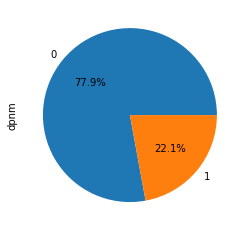

In [22]:
round(data['dpnm'].value_counts()[[0,1]], 2).plot.pie(autopct= '%1.1f%%')

---

- Detectign and Removing duplicated values

In [23]:
data.duplicated().value_counts()

False    29964
True        36
dtype: int64

In [24]:
data = data.drop_duplicates()

#### Define a 3 columns :
    1)- the first column is a sum of  PAY_1 --> PAY_6
    2)- the second column is a sum of  BILL_AMT_1 --> BILL_AMT_6
    3)- the third column is a sum of  PAY_AMT_1 --> PAY_AMT_6



     


In [25]:
data['PAY'] = data[[ 'PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis = 1)
data.drop(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],axis = 1,inplace = True)

In [26]:
data['BILL_AMT'] = data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].abs().sum(axis = 1)
data.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'],axis = 1,inplace = True)

In [27]:
data['PAY_AMT'] = data[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis = 1)
data.drop(['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis = 1,inplace = True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29964 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29964 non-null  int64
 1   SEX        29964 non-null  int64
 2   EDUCATION  29964 non-null  int64
 3   MARRIAGE   29964 non-null  int64
 4   AGE        29964 non-null  int64
 5   dpnm       29964 non-null  int64
 6   PAY        29964 non-null  int64
 7   BILL_AMT   29964 non-null  int64
 8   PAY_AMT    29964 non-null  int64
dtypes: int64(9)
memory usage: 2.3 MB


In [29]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
count,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,29964.000000,2.996400e+04,2.996400e+04
mean,167445.924443,1.603758,1.821419,1.555467,35.488286,0.221266,-1.085603,2.706357e+05,3.168884e+04
std,129760.526760,0.489124,0.709084,0.518162,9.219450,0.415106,5.888130,3.795850e+05,6.085458e+04
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,-12.000000,0.000000e+00,0.000000e+00
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-5.000000,2.966350e+04,6.700000e+03
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,1.269175e+05,1.440000e+04
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,3.431485e+05,3.360000e+04
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,1.000000,36.000000,5.263883e+06,3.764066e+06


---
### Data Visualization


In [30]:
data.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
LIMIT_BAL,1.000000,0.024978,-0.242657,-0.110707,0.144617,-0.153890,-0.316964,0.303051,0.353039
SEX,0.024978,1.000000,0.012193,-0.029622,-0.091103,-0.039765,-0.069881,-0.026285,-0.004903
EDUCATION,-0.242657,0.012193,1.000000,-0.145036,0.188605,0.046601,0.145186,-0.007319,-0.079771
MARRIAGE,-0.110707,-0.029622,-0.145036,1.000000,-0.415193,-0.026338,0.034936,-0.027592,-0.012428
AGE,0.144617,-0.091103,0.188605,-0.415193,1.000000,0.013601,-0.058574,0.054937,0.040642
dpnm,-0.153890,-0.039765,0.046601,-0.026338,0.013601,1.000000,0.281975,-0.012777,-0.102498
PAY,-0.316964,-0.069881,0.145186,0.034936,-0.058574,0.281975,1.000000,0.281012,-0.075356
BILL_AMT,0.303051,-0.026285,-0.007319,-0.027592,0.054937,-0.012777,0.281012,1.000000,0.345953
PAY_AMT,0.353039,-0.004903,-0.079771,-0.012428,0.040642,-0.102498,-0.075356,0.345953,1.000000


<Figure size 3024x2880 with 0 Axes>

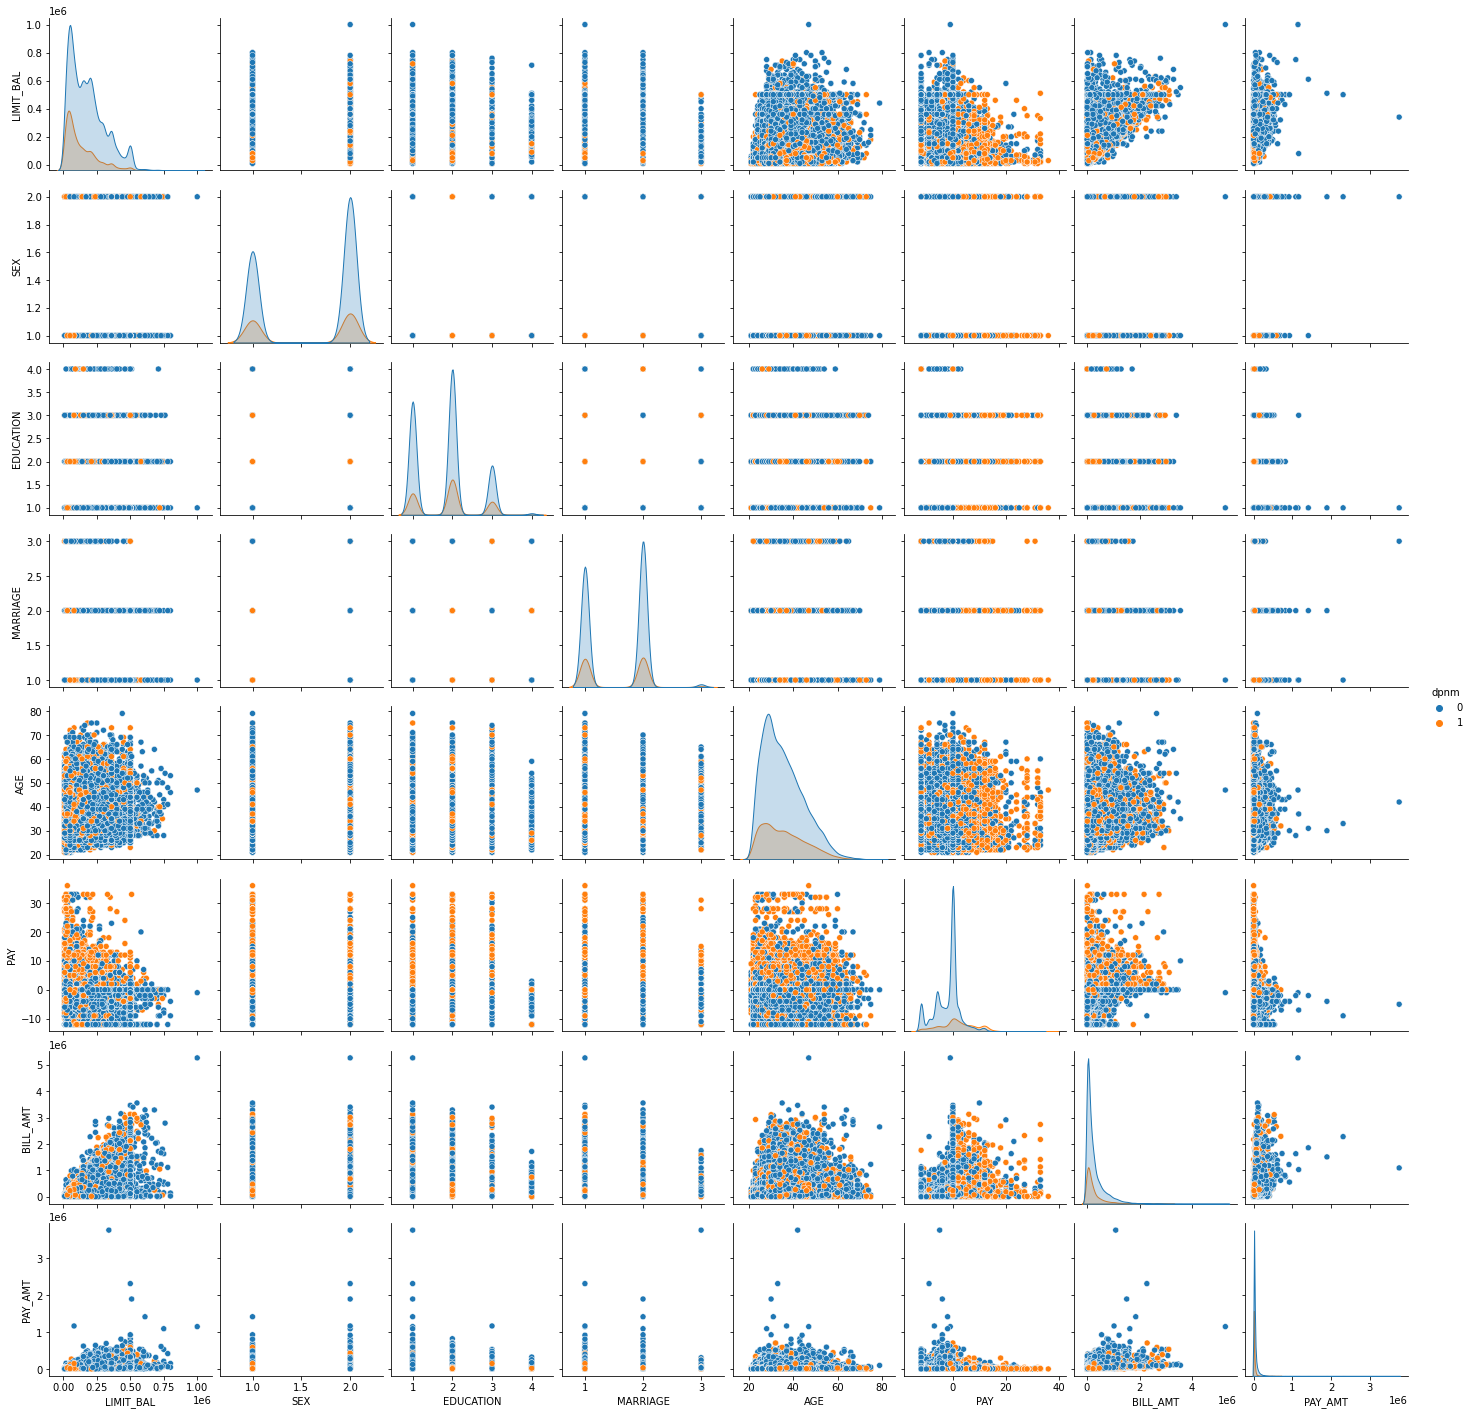

In [31]:
plt.figure(figsize=(42,40))
sns.pairplot(data, hue="dpnm")

<AxesSubplot:>

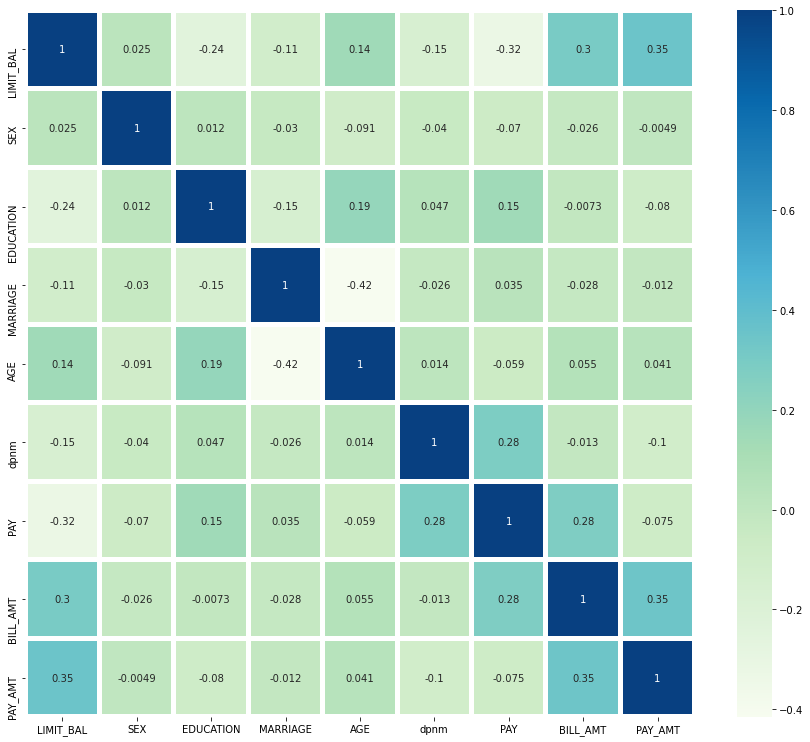

In [32]:
plt.figure(figsize=(15,13))
sns.heatmap(data.corr(),cbar = True,cmap = 'GnBu', annot =True, linewidths=4, linecolor='white')

#### From Fig:
    - PAY_AMIT | LIMIT_BAL = 0.35
    - BILL_AMIT | LIMIT_BAL = 0.3
    - BILL_AMT | PAY_AMT = 0.35
    - PAY | dpnm = 0.28

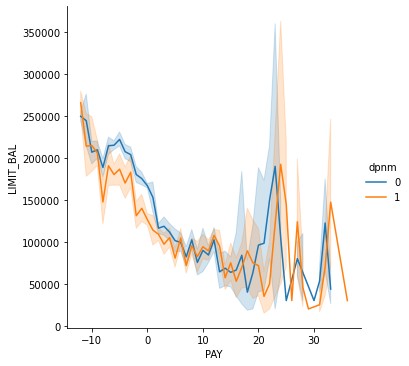

In [33]:
sns.relplot(x = 'PAY', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

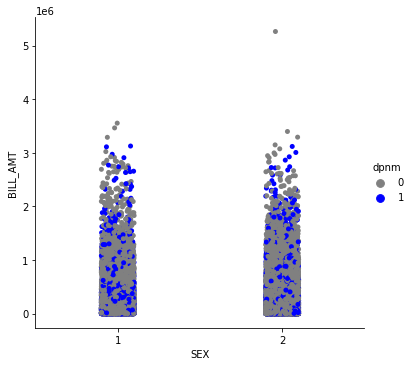

In [34]:
sns.catplot(x = 'SEX', y = 'BILL_AMT' ,hue = 'dpnm', data = data,palette=['Grey','b'])

the above fig. illustrate nature of bill range  

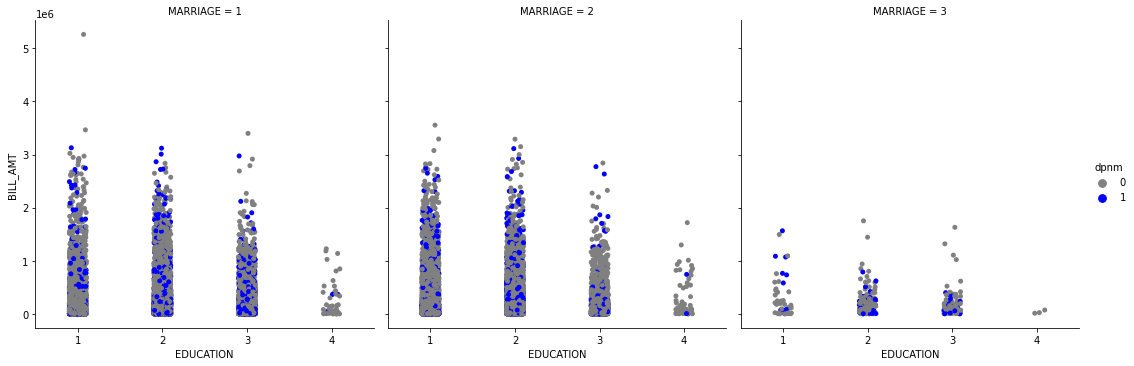

In [35]:
sns.catplot(y='BILL_AMT', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Grey','b']) 

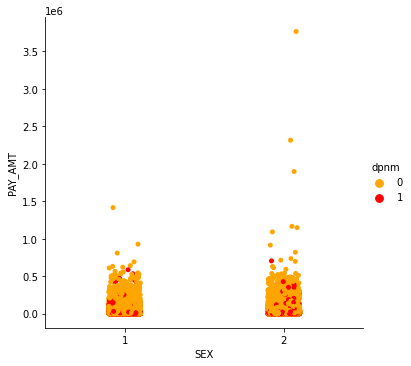

In [36]:
sns.catplot(x = 'SEX', y = 'PAY_AMT' ,hue = 'dpnm', data = data,palette=['Orange','r'])

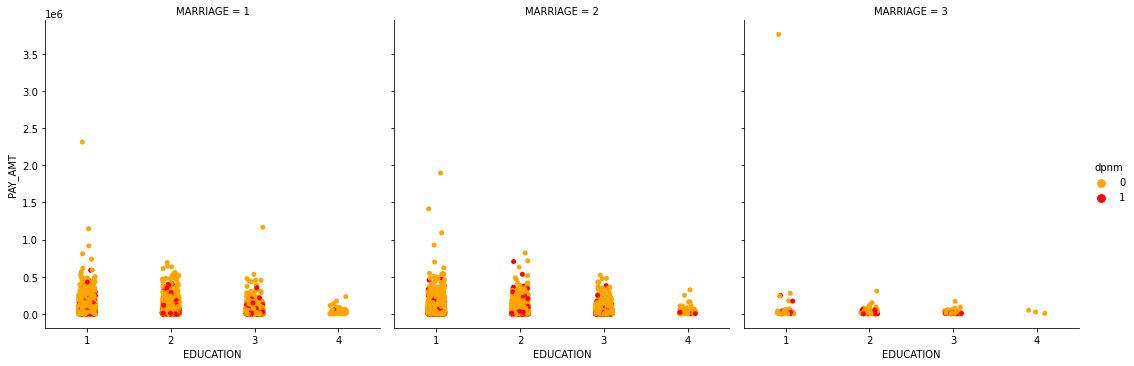

In [37]:
sns.catplot(y='PAY_AMT', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Orange','Red']) 

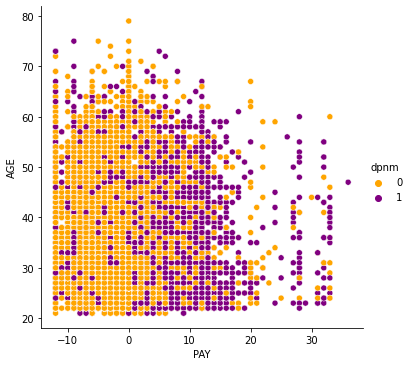

In [38]:
sns.relplot(x = 'PAY', y = 'AGE' ,hue = 'dpnm', data = data,palette=['Orange','Purple'])

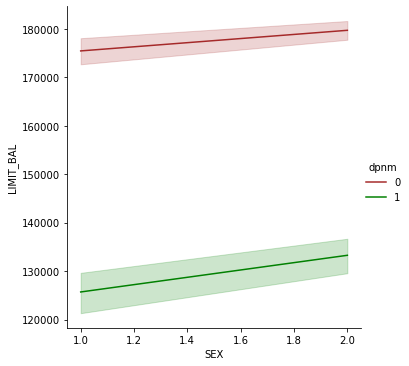

In [39]:
sns.relplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data,palette= ['Brown','g'])

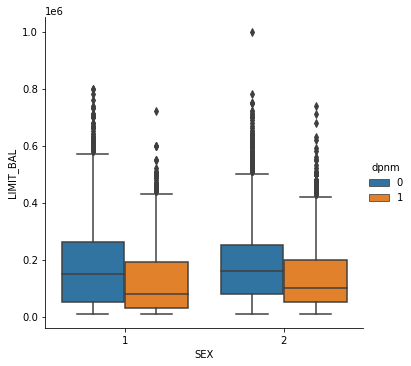

In [40]:
sns.catplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'box', data = data)

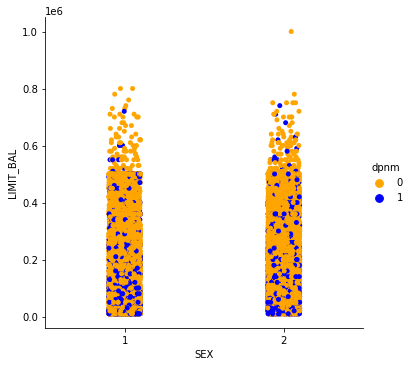

In [41]:
sns.catplot(x = 'SEX', y = 'LIMIT_BAL' ,hue = 'dpnm', data = data,palette= ['Orange','b'])

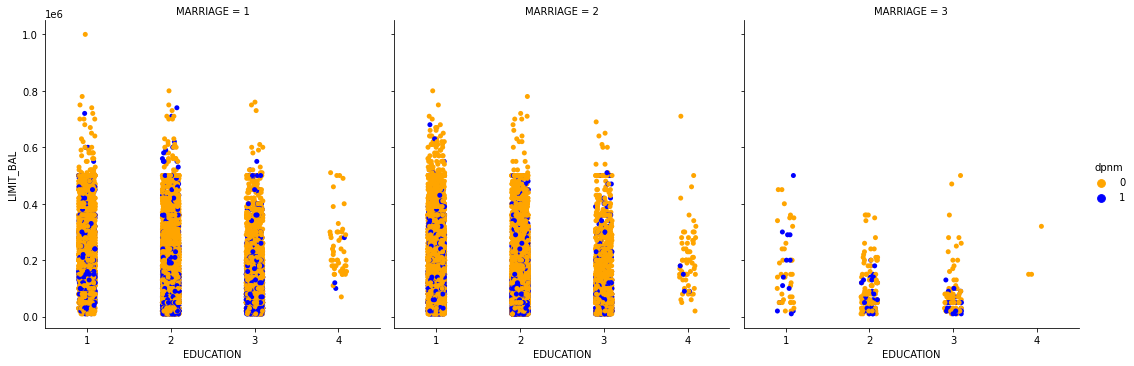

In [42]:
sns.catplot(y='LIMIT_BAL', x='EDUCATION', hue='dpnm', data = data,col='MARRIAGE', kind='strip',palette=['Orange','b']) 

In [43]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'dpnm', 'PAY',
       'BILL_AMT', 'PAY_AMT'],
      dtype='object')

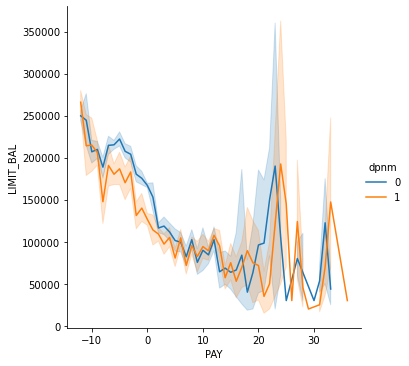

In [44]:
sns.relplot(x = 'PAY', y = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

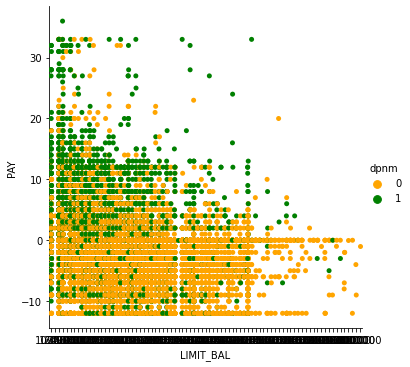

In [45]:
sns.catplot(y='PAY', x='LIMIT_BAL', hue='dpnm', data = data, kind='strip',palette=['Orange','g']) 

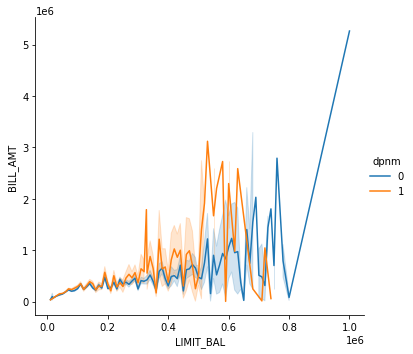

In [46]:
sns.relplot(y = 'BILL_AMT', x = 'LIMIT_BAL' ,hue = 'dpnm',kind = 'line', data = data)

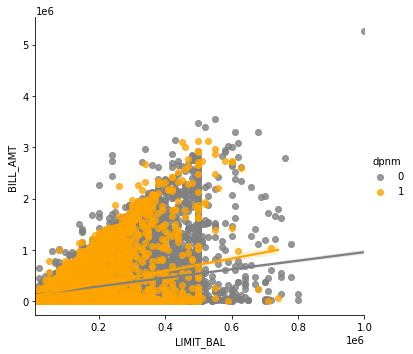

In [47]:
g = sns.lmplot(
    data=data,
    y="BILL_AMT", x="LIMIT_BAL", hue="dpnm",
    height=5,palette= ['Grey','Orange'])

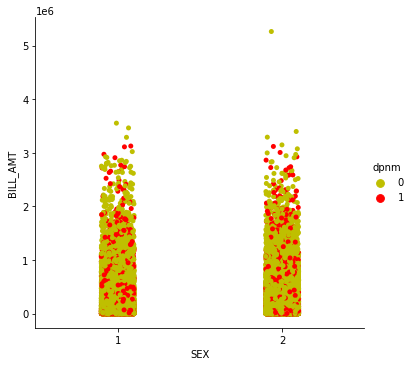

In [48]:
sns.catplot(y='BILL_AMT', x='SEX', hue='dpnm', data = data, kind='strip',palette = ['y','r']) 

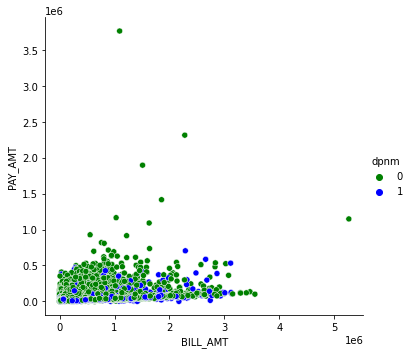

In [49]:
#sns.catplot(x='BILL_AMT', y='PAY_AMT', hue='dpnm', data = data, kind='point') 
sns.relplot(data=data, x="BILL_AMT", y="PAY_AMT", hue="dpnm" ,palette = ['g','b'])


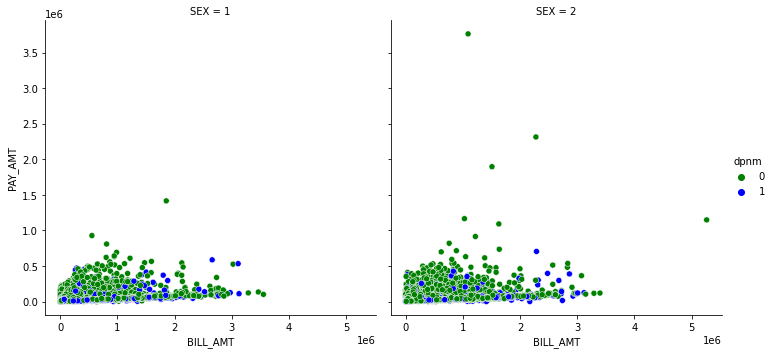

In [50]:
sns.relplot(y='PAY_AMT', x='BILL_AMT', hue='dpnm', data = data,col='SEX',palette=['g','b']) 

<Figure size 3024x2880 with 0 Axes>

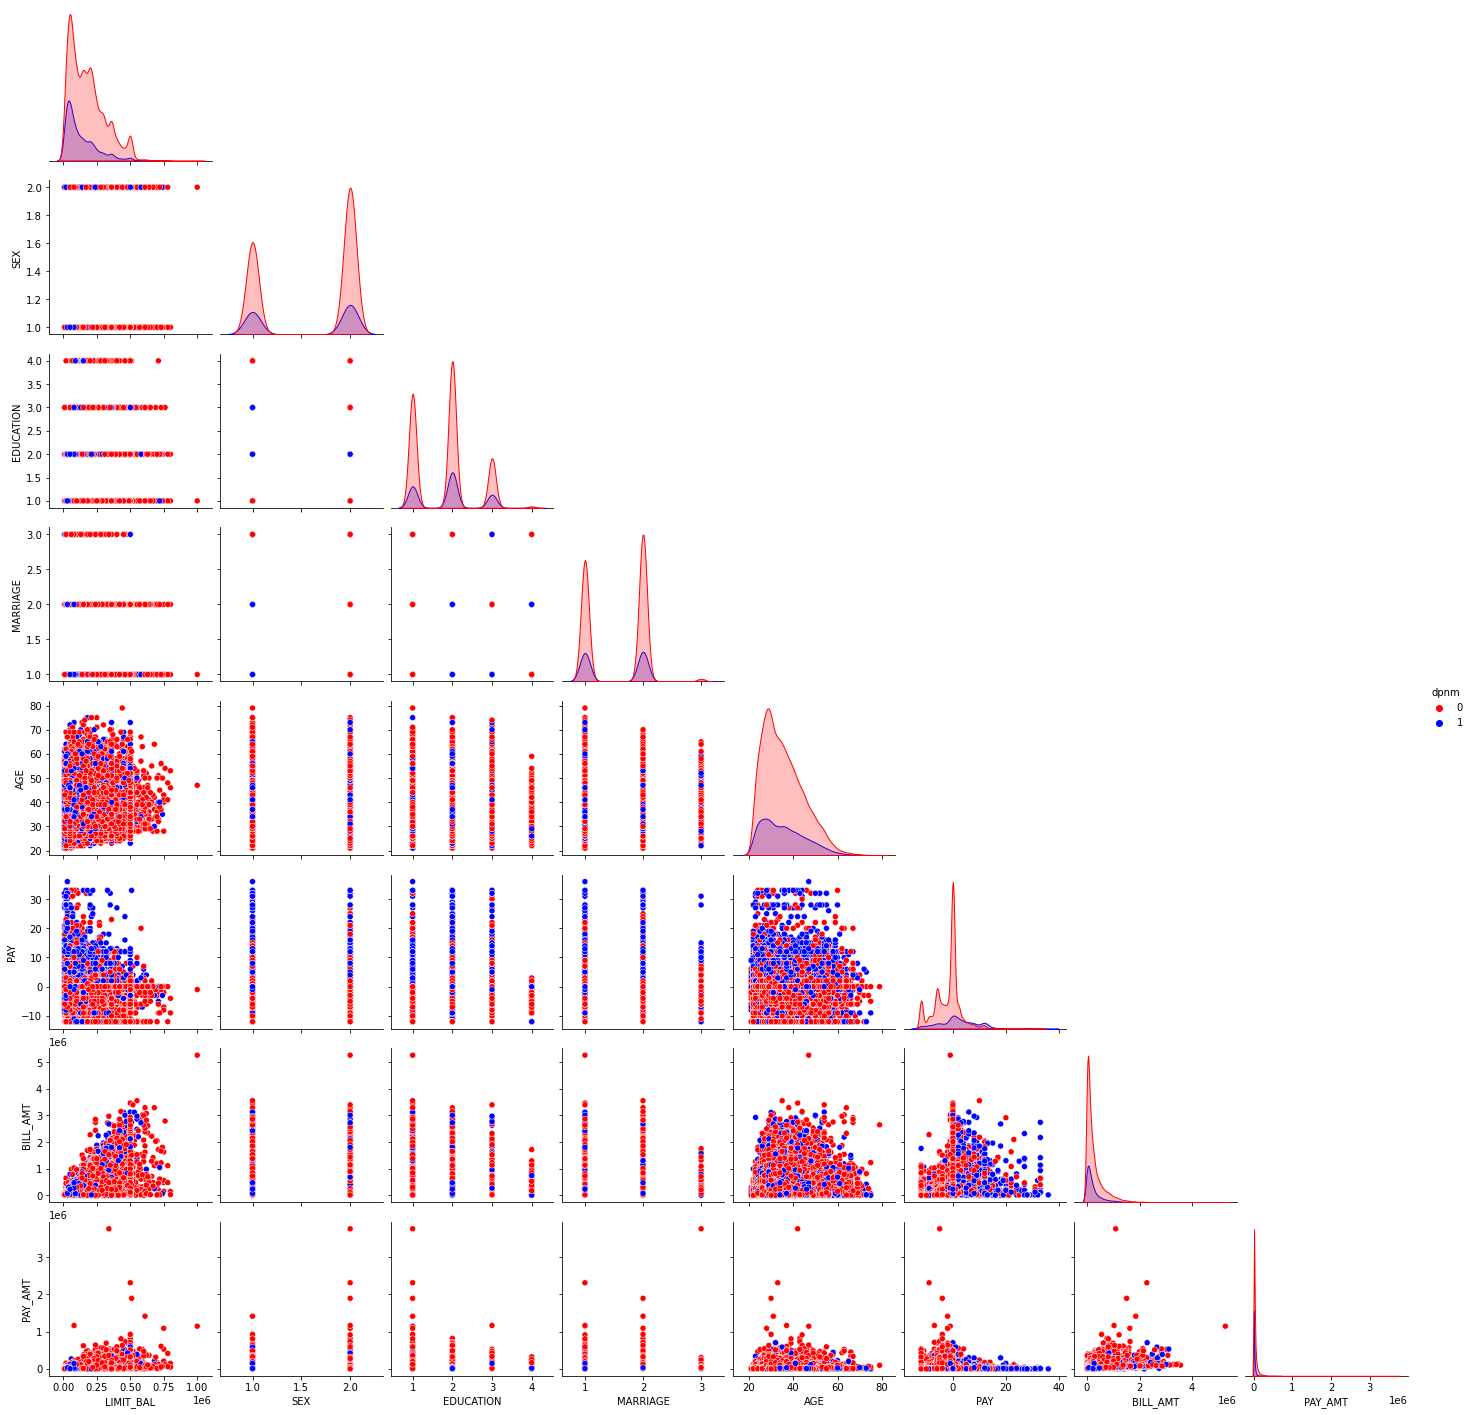

In [51]:
plt.figure(figsize=(42,40))
sns.pairplot(data, hue="dpnm",corner=True,palette=['r','b'])

### Standralize the Data

---



In [52]:
X = data.drop('dpnm', axis = 1)    
Y = data[['dpnm']]   

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1, stratify = Y)

In [54]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [55]:
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [56]:
data.LIMIT_BAL = (data.LIMIT_BAL - data.LIMIT_BAL.mean())/data.LIMIT_BAL.std()
data.BILL_AMT = (data.BILL_AMT - data.BILL_AMT.mean())/data.BILL_AMT.std()
data.PAY_AMT = (data.PAY_AMT - data.PAY_AMT.mean())/data.PAY_AMT.std()
data.AGE = (data.AGE - data.AGE.mean())/data.AGE.std()

In [57]:
data.to_csv('C:\\Users\\hossam\\Desktop\\data.csv', )

In [58]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,dpnm,PAY,BILL_AMT,PAY_AMT
0,-1.136293,2,2,1,-1.246092,1,-2,-0.692682,-0.509409
1,-0.365642,2,2,2,-1.029160,1,3,-0.667989,-0.438567
2,-0.596837,2,2,2,-0.161429,0,0,-0.445177,-0.339676
3,-0.905097,2,2,1,0.163970,0,0,-0.103539,-0.382894
4,-0.905097,1,2,1,2.333297,0,-2,-0.424929,0.449599


# Modeling Data:
## Try the Model with Original Data
 * Use three Algorithms



## **1 - Logistic Regression** : Using Grid Search

In [59]:
logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

logreg.fit(x_train,y_train)

LogisticRegression(n_jobs=-1, random_state=25)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg']}

# Logistic Regression estimator.
default_logreg=LogisticRegression(multi_class='auto', random_state=25, n_jobs=-1)

# GridSearchCV estimator.
gs_logreg = GridSearchCV(default_logreg, parameters, cv=10, n_jobs=-1, verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_logreg.fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=LogisticRegression(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000],
                         'penalty': ['none', 'l2'],
                         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']},
             verbose=1)

In [62]:
gs_logreg.score(x_train, y_train)

0.7974218847774394

In [63]:
gs_logreg.score(x_test,y_test)

0.797096612714834

In [64]:
prediction_lr=gs_logreg.predict(x_test)

In [65]:
print('\n clasification report:\n', classification_report(y_test,prediction_lr))


 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      4667
           1       0.69      0.15      0.24      1326

    accuracy                           0.80      5993
   macro avg       0.75      0.56      0.56      5993
weighted avg       0.78      0.80      0.74      5993



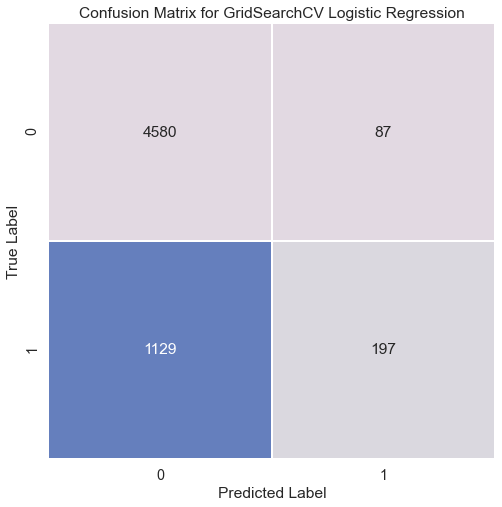

In [66]:
# Make predictions with the best parameters.
gs_log_pred=gs_logreg.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

# 2- LogisticRegression

In [67]:
rgr = LogisticRegression()

In [68]:
rgr.fit(x_train,y_train)

LogisticRegression()

In [69]:
rgr.score(x_train,y_train)

0.778732635267615

In [70]:
rgr.score(x_test,y_test)

0.7787418655097614

In [71]:
prediction_lr=rgr.predict(x_test)

In [72]:
print('\n clasification report:\n', classification_report(y_test,prediction_lr))


 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4667
           1       0.00      0.00      0.00      1326

    accuracy                           0.78      5993
   macro avg       0.39      0.50      0.44      5993
weighted avg       0.61      0.78      0.68      5993



---
## **3- Decision tree**: Using Grid Search


In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Hyperparameters to be checked.
parameters = {'criterion':['gini','entropy'],
              'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
             }

# MLP estimator.
default_tr = tree.DecisionTreeClassifier(random_state=25)

# GridSearchCV estimator.
gs_tree = GridSearchCV(default_tr, parameters, cv=10, n_jobs=-1,verbose=1)

# Train the GridSearchCV estimator and search for the best parameters.
gs_tree.fit(x_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=25),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20]},
             verbose=1)

In [75]:
gs_tree.score(x_train,y_train)

0.8076842851779233

In [76]:
gs_tree.score(x_test,y_test)

0.8027698982145837

In [77]:
prediction_lr=gs_tree.predict(x_test)
print('\n clasification report:\n', classification_report(y_test,prediction_lr))


 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.62      0.29      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.72      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



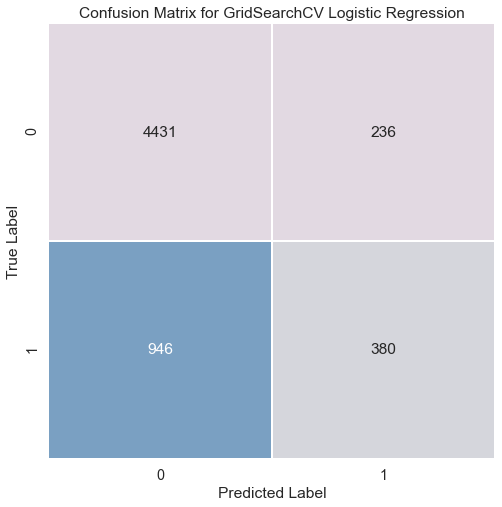

In [78]:
# Make predictions with the best parameters.
gs_log_pred=gs_tree.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

---
## **4 - Decision tree**


In [79]:
# Initialize a decision tree estimator.
tr = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=25)
 
# Train the estimator.
tr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [80]:
tr.score(x_train,y_train)

0.8076842851779233

In [81]:
tr.score(x_test,y_test)

0.8027698982145837

In [82]:
prediction_lr=tr.predict(x_test)
print('\n clasification report:\n', classification_report(y_test,prediction_lr))



 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88      4667
           1       0.62      0.29      0.39      1326

    accuracy                           0.80      5993
   macro avg       0.72      0.62      0.64      5993
weighted avg       0.78      0.80      0.77      5993



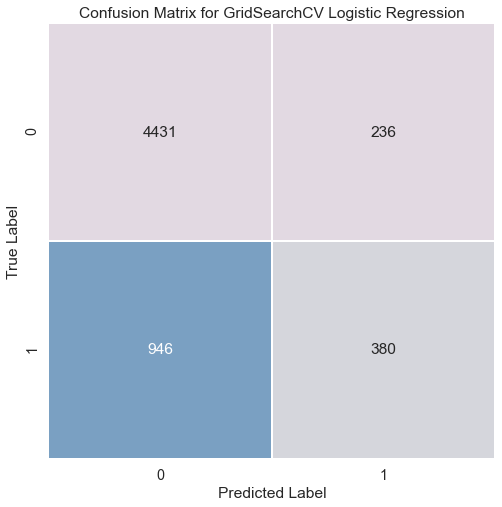

In [83]:
# Make predictions with the best parameters.
gs_log_pred=tr.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

# 5 - Random Force 

In [84]:
rf = RandomForestClassifier(n_estimators=10,max_depth=7,max_features=4)

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features=4, n_estimators=10)

In [87]:
rf.score(x_train,y_train)

0.8189061782987777

In [88]:
rf.score(x_test,y_test)

0.8051059569497747

In [90]:
prediction_lr=rf.predict(x_test)
print('\n clasification report:\n', classification_report(y_test,prediction_lr))



 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88      4667
           1       0.62      0.31      0.42      1326

    accuracy                           0.81      5993
   macro avg       0.72      0.63      0.65      5993
weighted avg       0.78      0.81      0.78      5993



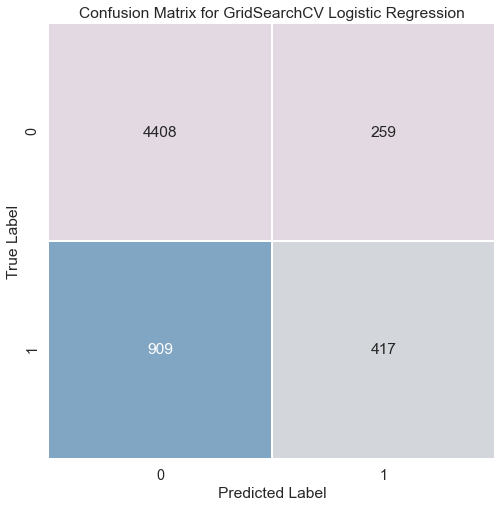

In [91]:
# Make predictions with the best parameters.
gs_log_pred=rf.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

# 6- GaussianNB

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [94]:
gnb.fit(x_train,y_train)

GaussianNB()

In [95]:
gnb.score(x_train,y_train)

0.7834466647198698

In [96]:
gnb.score(x_test,y_test)

0.7817453695978642

In [97]:
prediction_lr=gnb.predict(x_test)
print('\n clasification report:\n', classification_report(y_test,prediction_lr))



 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4667
           1       0.67      0.03      0.05      1326

    accuracy                           0.78      5993
   macro avg       0.73      0.51      0.46      5993
weighted avg       0.76      0.78      0.69      5993



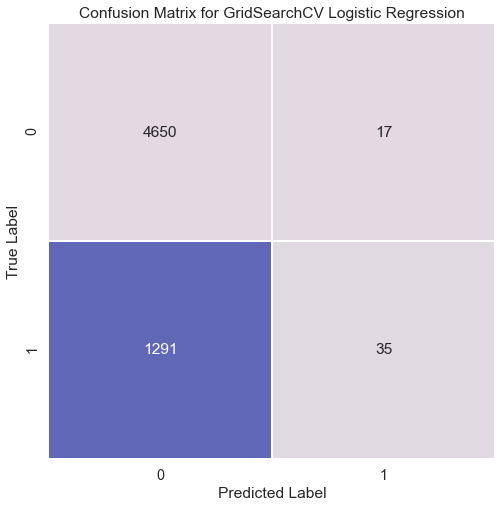

In [98]:
# Make predictions with the best parameters.
gs_log_pred=gnb.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

# 7- AdaBoost

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [106]:
ada = AdaBoostClassifier(n_estimators=7, learning_rate=0.6)

In [107]:
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=7)

In [108]:
ada.score(x_train,y_train)

0.8009261190605315

In [109]:
ada.score(x_test,y_test)

0.7977640580677458

In [110]:
prediction_lr=gnb.predict(x_test)
print('\n clasification report:\n', classification_report(y_test,prediction_lr))



 clasification report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      4667
           1       0.67      0.03      0.05      1326

    accuracy                           0.78      5993
   macro avg       0.73      0.51      0.46      5993
weighted avg       0.76      0.78      0.69      5993



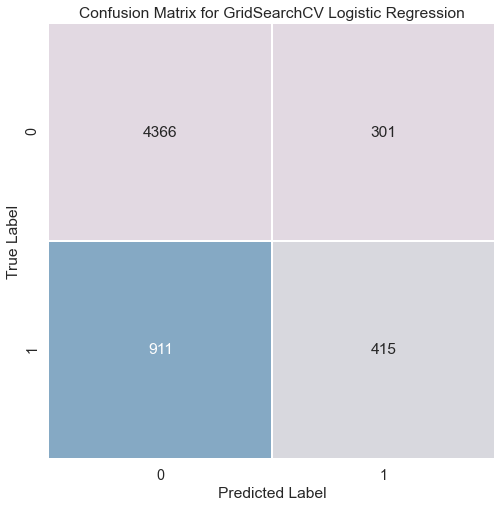

In [112]:
# Make predictions with the best parameters.
gs_log_pred=ada.predict(x_test)

# Print confusion matrix for Logistic regression.
gs_logreg_matrix = confusion_matrix(y_test,gs_log_pred)
sns.set(font_scale=1.3)
plt.subplots(figsize=(8, 8))
sns.heatmap(gs_logreg_matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV Logistic Regression');

---
## **8- Neural Network**: Using Grid Search

In [ ]:
# Hyperparameters to be checked.
parameters = {'activation':['logistic','relu'],
              'solver': ['lbfgs','adam','sgd'],
              'alpha':10.0 ** -np.arange(1,3),
              'hidden_layer_sizes':[(23),(12,5),(12,5,2),(3,1),(5)]}

# Decision tree estimator.
default_mlp = MLPClassifier(random_state=42)

# GridSearchCV estimator.
gs_mlp = GridSearchCV(default_mlp, parameters, cv=10, n_jobs=-1,verbose=10)

# Train the GridSearchCV estimator and search for the best parameters.
gs_mlp.fit(x_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


In [ ]:
# Make predictions with the best parameters.
gs_mlp_pred=gs_mlp.predict(x_test)

In [ ]:
# Plot confusion matrix for GridSearchCV Multi-layer Perceptron.
matrix = confusion_matrix(y_test,gs_mlp_pred)
plt.figure(figsize=(8,8))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for GridSearchCV MLP');

# Modeling Data:
## Try the Model with Balanced Data
 * Use three Algorithms

## **Logistic Regression**: Using Grid Search


---
## **Decision tree**: Using Grid Search


---
## **Neural Network**: Using Grid Search